In [23]:
from myplt import *
efmt = dict(lw=3.5, capsize=7., capthick=1.5, elinewidth=1.5, fmt='o-') # for plt.errorbar() plot

mycms_o = [ cms.set_alpha(c, 1.0) for c in mycms ]

# new settings
matplotlib.rc( 'lines', linewidth=3 )
matplotlib.rc( 'font', family='monospace', weight='normal', size=20 )

c_frame = (0,0,0,.8)
for tick in 'xtick', 'ytick':
    matplotlib.rc( tick+'.major', width=2.5, size=12)
    matplotlib.rc( tick+'.minor', width=1.5, size=4.5, visible=True )
    matplotlib.rc( tick, color=c_frame, labelsize=18, direction='in' )
matplotlib.rc( 'xtick', top=True )
matplotlib.rc( 'ytick', right=True )
matplotlib.rc( 'axes', linewidth=1.5, edgecolor=c_frame, labelweight='normal' )
matplotlib.rc( 'grid', color=c_frame )
matplotlib.rc( 'patch', edgecolor=c_frame )

In [24]:
dsets = [ './omp.quad', './omp.mc', './omp.quad.simd','./mpi.quad', './mpi.mc',  './pthreads.quad' ,'./linuxfork.quad' ]
names = [ r'OMP\ (Quad)', r'OMP\ (MC)', r'OMP+AVX\ (Quad)', r'MPI\ (Quad)', r'MPI\ (MC)', r'Pthreads\ (Quad)', r'Linux\ Sys-call\ (Quad)' ]

In [25]:
data_chproc = [ np.loadtxt(f, dtype=float)[:7] for f in dsets]
data_chtask = [ np.loadtxt(f, dtype=float)[7:] for f in dsets]

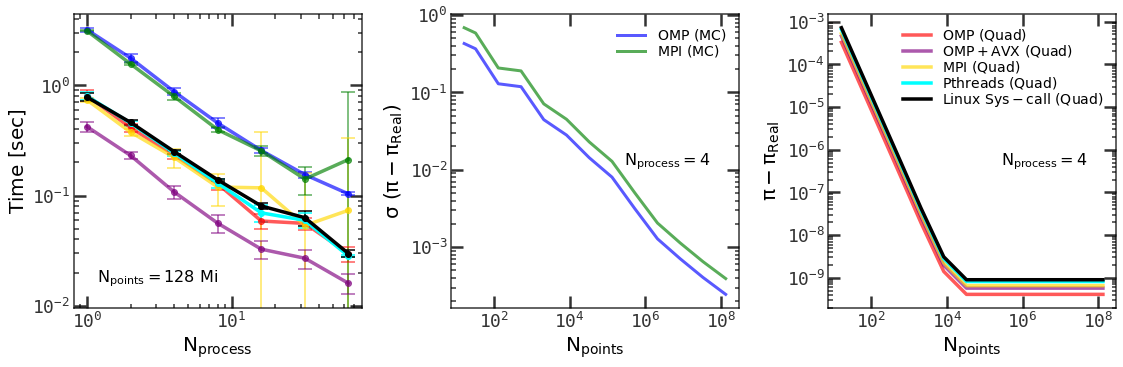

In [32]:
_, axs = m_get_figure( (16, 5.5), 1, 3 )
axs = axs[0]

ax = axs[0]
for i in range(7):
    d = data_chproc[i]
    ax.errorbar( d[:, 0], d[:, 4], yerr = d[:,5], **efmt, color=mycms[i] )
m_set_scale(ax,'log','log')
m_set_label(ax, r'$\rm N_{process}$', r'$\rm Time\ [sec]$')
txpos( ax, r'$\rm N_{points}=128\ Mi$', (.08, .1), 'k' )

for i in range(7):
    d = data_chtask[i]
    if i in [1, 4]:
        axs[1].plot( d[:, 1], d[:,3]*(1+0.2*(i-1)), label=r'$\rm %s$'%( names[i] ), color=mycms[i] )
    else:
        axs[2].plot( d[:, 1], np.abs(d[:, 2]-np.pi)*(1+0.2*i), lw=3.5, label=r'$\rm %s$'%( names[i] ), color=mycms[i]  )
for ax in axs[1:]:
    m_set_scale(ax,'log', 'log')
    ax.legend(loc='upper right', frameon=False, columnspacing=0, labelspacing=0, fontsize=14)
    
    txpos( ax, r'$\rm N_{process}=4$', (.6, .5), 'k' )
m_set_label(axs[1], r'$\rm N_{points}$', r'$\rm \sigma\ (\pi-\pi_{Real})$')
m_set_label(axs[2], r'$\rm N_{points}$', r'$\rm \pi-\pi_{Real} $')
    
plt.tight_layout()
plt.savefig('scaling.pdf')
plt.show()